In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = pd.read_csv('df2_encoded.csv')
df = pd.DataFrame(file)
df.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,1,35.0,0,0,1,0,0,1,1,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,1,33.0,0,0,1,0,1,1,1,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,0,35.0,1,0,1,0,1,1,1,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,0,35.0,1,0,1,0,1,1,1,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,1,32.0,0,0,0,1,0,1,1,3.0,4.1,8.0,7.1,3.7


# only with Traning data, no Scaling

**Divide Data into Train and test**

In [3]:
from sklearn.model_selection import train_test_split
#  'event' is the target variable that we want to predict
target = df['event']

# Drop the target variable from the features
features = df.drop('event', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [4]:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (903, 15)
y_train : (903,)
X_test : (226, 15)
y_test : (226,)


Confusion Matrix:
[[450   0]
 [  0 453]]


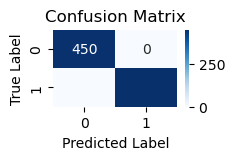

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       450
           1       1.00      1.00      1.00       453

    accuracy                           1.00       903
   macro avg       1.00      1.00      1.00       903
weighted avg       1.00      1.00      1.00       903

Accuracy on Training Data: 1.0
Accuracy on Testing Data: 0.6283185840707964


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

#  'event' is the target variable that we want to predict
target = df['event']

# Drop the target variable from the features
features = df.drop('event', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



# Initialize the RF classifier
rf_Model1 = RandomForestClassifier(random_state=42)#RandomForestClassifier()   #oob_score=True

# Fit the model on the training data
rf_Model1.fit(X_train, y_train)


# Make predictions on the training data
train_predictions = rf_Model1.predict(X_train)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_train, train_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(2, 1))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Get the classification report for the training data
class_report_train = classification_report(y_train, train_predictions)
print("Classification Report for Training Data:")
print(class_report_train)

# If you want to see the accuracy score for the training data
accuracy_score_train = rf_Model1.score(X_train, y_train)
print(f"Accuracy on Training Data: {accuracy_score_train}")

# If you want to see the accuracy score for the testing data
accuracy_score_test= rf_Model1.score(X_test, y_test)
print(f"Accuracy on Testing Data: {accuracy_score_test}")


RF lernt auswedig auf Training Daten
Auswerten bei Training Daten macht kein Sinn

# only with Traning data, with Standard Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.fit_transform(X_test)

# Initialize the KNN classifier
rf_Model2 =  RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_Model2.fit(X_train2, y_train)


# Make predictions on the training data
train_predictions2 = rf_Model2.predict(X_train2)

# Calculate the confusion matrix
conf_matrix2 = confusion_matrix(y_train, train_predictions2)

# Print the confusion matrix
print("Confusion Matrix2:")
print(conf_matrix2)


# Get the classification report for the training data
class_report_train2 = classification_report(y_train, train_predictions2)
print("Classification Report for Training Data:")
print(class_report_train2)

# If you want to see the accuracy score for the training data
accuracy_score_train2 = rf_Model2.score(X_train2, y_train)
print(f"Accuracy on Training Data: {accuracy_score_train2}")

# If you want to see the accuracy score for the testing data
accuracy_score_test2= rf_Model2.score(X_test2, y_test)
print(f"Accuracy on Testing Data: {accuracy_score_test2}")

Confusion Matrix2:
[[450   0]
 [  0 453]]
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       450
           1       1.00      1.00      1.00       453

    accuracy                           1.00       903
   macro avg       1.00      1.00      1.00       903
weighted avg       1.00      1.00      1.00       903

Accuracy on Training Data: 1.0
Accuracy on Testing Data: 0.6327433628318584


# only with Traning data, with MinMax Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train3 = scaler.fit_transform(X_train)
X_test3 = scaler.fit_transform(X_test)

# Initialize the KNN classifier
rf_Model3 =  RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_Model3.fit(X_train3, y_train)


# Make predictions on the training data
train_predictions3 = rf_Model3.predict(X_train3)

# Calculate the confusion matrix
conf_matrix3 = confusion_matrix(y_train, train_predictions3)

# Print the confusion matrix
print("Confusion Matrix3:")
print(conf_matrix3)


# Get the classification report for the training data
class_report_train3 = classification_report(y_train, train_predictions3)
print("Classification Report for Training Data:")
print(class_report_train3)

# If you want to see the accuracy score for the training data
accuracy_score_train3 = rf_Model3.score(X_train3, y_train)
print(f"Accuracy on Training Data: {accuracy_score_train3}")

# If you want to see the accuracy score for the testing data
accuracy_score_test3= rf_Model3.score(X_test3, y_test)
print(f"Accuracy on Testing Data: {accuracy_score_test3}")

Confusion Matrix3:
[[450   0]
 [  0 453]]
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       450
           1       1.00      1.00      1.00       453

    accuracy                           1.00       903
   macro avg       1.00      1.00      1.00       903
weighted avg       1.00      1.00      1.00       903

Accuracy on Training Data: 1.0
Accuracy on Testing Data: 0.6504424778761062


das Algorithmus scheint auswendig die Traings daten deswegen hohen score

# here start with Cross_Val_Score (9 folder is best) with MinMaxScaler

In [8]:
from sklearn.model_selection import cross_val_score

rf_Model4 =  RandomForestClassifier(random_state=42)

for i in range(2, 11):
    scores = cross_val_score(rf_Model4, X_train3, y_train, cv=i, scoring='accuracy') #with Standard Scaling
    mean_score = scores.mean()
    std_dev = scores.std()
    print(f"Mean accuracy for {i} folds: {mean_score:.2f}")
    print(f"Standard deviation for {i} folds: {std_dev:.2f}")
    print('*'*50)

Mean accuracy for 2 folds: 0.58
Standard deviation for 2 folds: 0.00
**************************************************
Mean accuracy for 3 folds: 0.58
Standard deviation for 3 folds: 0.02
**************************************************
Mean accuracy for 4 folds: 0.60
Standard deviation for 4 folds: 0.02
**************************************************
Mean accuracy for 5 folds: 0.60
Standard deviation for 5 folds: 0.04
**************************************************
Mean accuracy for 6 folds: 0.60
Standard deviation for 6 folds: 0.03
**************************************************
Mean accuracy for 7 folds: 0.61
Standard deviation for 7 folds: 0.05
**************************************************
Mean accuracy for 8 folds: 0.60
Standard deviation for 8 folds: 0.04
**************************************************
Mean accuracy for 9 folds: 0.63
Standard deviation for 9 folds: 0.05
**************************************************
Mean accuracy for 10 folds: 0.60
Standar

**9 Folds ist die beste**
der score ist schlechter geworden weil

# Build Random Forest Model with hyperparameters

In [9]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [10]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [11]:
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_features': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    #'max_features' : ['auto', 'sqrt'],
    'max_depth': [4, 6, 8, None],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
     # Minimum number of samples required to split a node
    'min_samples_split' : [2, 5],
    # Minimum number of samples required at each leaf node
    'min_samples_leaf' :[1, 2]
}

In [12]:
rf_Model =  RandomForestClassifier(random_state=42)

In [13]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 9, verbose=2, n_jobs = 4)

In [14]:
# Fit GridSearchCV to find the best parameters
rf_Grid.fit(X_train, y_train)

# Get the best parameters
best_params = rf_Grid.best_params_
print("Best parameters:", best_params)

print('*'*50)
print("Gridsearch-Score",cross_val_score( rf_Grid.best_estimator_, X_train3, y_train))
print('*'*50)
# Get the best score
best_score = rf_Grid.best_score_
print("Best cross-validation score:", best_score)

# The best model is also available
best_rf = rf_Grid.best_estimator_

Fitting 9 folds for each of 2880 candidates, totalling 25920 fits
Best parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 30}
**************************************************
Gridsearch-Score [0.56353591 0.60773481 0.62430939 0.65       0.61111111]
**************************************************
Best cross-validation score: 0.647975797579758


In [15]:
best_rf

RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=6,
                       min_samples_leaf=2, min_samples_split=5, n_estimators=30,
                       random_state=42)

# Check Accuracy for best_estimator

In [18]:
#predictions_best = best_rf.predict(X_test)
best_rf.fit(X_train3,y_train)
print (f'Train Accuracy - : {best_rf.score(X_train3,y_train):.3f}') #Mit Sklaierung
print (f'Test Accuracy - : {best_rf.score(X_test3,y_test):.3f}')  # Mit Sklaierung

Train Accuracy - : 0.999
Test Accuracy - : 0.588
